#### Alternative to projected gradient descent

For a convex $f$, we consider the following

$$\min f(x), \, \text{s.t. } x\in C$$

We know previously that we can use `projected gradient descent`

$$x^{k+1}=P_C\left(x^k-\alpha_k \nabla f(x^k)\right)$$

What `Frank-Wolfe` algorithm does is to never have $x$ leave $C$

$$y^k = \arg\min_{y\in C} \nabla f(x^k)^Ty$$

and

$$\begin{align*}
x^{k+1}&=(1-\gamma_k)x^k+\gamma_ky^k \\
&=x^k+\gamma_k(y^k-x^k)
\end{align*}$$

Since $x^k$ and $y^k$ are both in $C$, therefore, their `convex combination` $x^{k+1}$ is also in $C$

$\gamma_k$ is often chosen as $\gamma_k=2/(k+1), k=1, 2,\cdots$

#### Where is $y^k$?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
import cvxpy as cp
import time

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

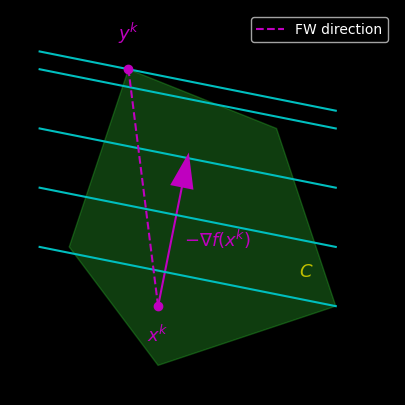

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.scatter(-1, -2, color='m', zorder=6)
plt.text(-1, -2.6, r'$x^k$', horizontalalignment='center', fontsize=13, color='m')

plt.plot([-1, -0.5], [-2, 0.5], 'm-')
ax.arrow(-0.5-0.1, 0.5-0.1/0.5*2.5, 0.001, 0.001/0.5*2.5,
         head_width=0.4, head_length=0.6, fc='m', ec='none', zorder=5)

plt.text(0, -1, r'$-\nabla f(x^k)$', horizontalalignment='center', fontsize=13, color='m')

polygon_points = np.array([[-1.5, 2], [-2.5, -1], [-1, -3], [2, -2], [1, 1]])
ax.fill(polygon_points[:, 0], polygon_points[:, 1], color='limegreen', alpha=0.3)

plt.plot([-3, 2], [1, 0], 'c-')
plt.plot([-3, 2], [0, -1], 'c-')
plt.plot([-3, 2], [-1, -2], 'c-')
plt.plot([-3, 2], [2, 1], 'c-')
plt.plot([-3, 2], [2.3, 1.3], 'c-')

plt.plot([-1, -1.5], [-2, 2], 'm--', label='FW direction')

plt.scatter(-1.5, 2, color='m', zorder=6)
plt.text(-1.5, 2.5, r'$y^k$', horizontalalignment='center', fontsize=13, color='m')

plt.text(1.5, -1.5, r'$C$', horizontalalignment='center', fontsize=13, color='y')

ax.set_xlim(-3.5, 3)
ax.set_ylim(-3.5, 3)
ax.set_aspect('equal')
ax.axis('off')
plt.legend(loc='upper right')
plt.show()

We can draw a set of parallel lines `perpendicular` to $-\nabla f(x^k)$ extending in the direction of $-\nabla f(x^k)$, then $y^k$ would be the point where the convex set $C$ touches the line that is `furthest` from $x^k$

The second step of convex combination would move $x^k$ along the direction $y^k-x^k$, which may not be the direction of $-\nabla f(x^k)$

Apparently this is useful when solving `linear minimization`

$$y^k =\arg\min_{y\in C} \nabla f(x^k)^Ty$$

is `simpler` than doing projection



#### Norm constraints

One type of convex set FW often deals with is arbitrary norm $C=\{x:\|x\|\leq t\}$

In this case, we have (recall subdifferential of arbitrary norm is expressed as $\partial \|x\|=\arg \max_{\|z\|_*\leq 1} z^Tx$)

$$\begin{align*}
y^k&\in \arg\min_{\|y\|\leq t} \nabla f(x^k)^Ty \\
&=(-t) \left(\arg\max_{\|y\|\leq 1} \nabla f(x^k)^Ty\right) \\
&=(-t) \left(\partial \|\nabla f(x^k)\|_* \right)
\end{align*}$$

Therefore, if we know how to compute the subgradient of dual norm, FW can be performed easily

#### Convergence

For a convex function $f$ that is $\beta$-smooth w.r.t. arbitrary norm, which by definition gives

$$\|\nabla f(x) - \nabla f(y)\|_* \leq \beta \|x-y\|$$

and we have the quadratic upper bound

$$\begin{align*}
f(x)-f(y)-\nabla f(y)^T(x-y)&\leq \frac{\beta}{2}\|x-y\|^2
\end{align*}$$

Let $R=\sup_{x, y \in C} \|x-y\|$

then, using FW algorithm to solve

$$\min f(x), \, \text{s.t. } x\in C$$

would produce the guarantee

$$f(x^k)-f(x^*)\leq \frac{2\beta R^2}{k+1}$$

##### Proof

Let $x=x^{k+1}$, $y=x^k$, and apply quadratic upper bound, we have

$$\begin{align*}
f(x^{k+1})-f(x^k)&\leq \nabla f(x^k)^T(x^{k+1}-x^k)+\frac{\beta}{2}\|x^{k+1}-x^k\|^2 \\
& x^{k+1}=(1-\gamma_k)x^k+\gamma_ky^k \\
&\leq \gamma_k \nabla f(x^k)^T(y^k-x^k)+\frac{\beta}{2} (\gamma_k)^2 R^2 \\
& \nabla f(x^k)^Ty^k\leq \nabla f(x^k)^Tx, \forall x\in C \\
&\leq \gamma_k \nabla f(x^k)^T(x^*-x^k)+\frac{\beta}{2} (\gamma_k)^2 R^2 \\
& \text{convexity of } f\\
&\leq \gamma_k \left(f(x^*)-f(x^k)\right)+\frac{\beta}{2} (\gamma_k)^2 R^2
\end{align*}$$

Rearrange

$$f(x^{k+1})-f(x^*) \leq (1-\gamma_k)\left(f(x^k)-f(x^*)\right)+\frac{\beta}{2} (\gamma_k)^2 R^2 $$

Define $\delta_k = f(x^k)-f(x^*)$

For base case where $k=1$, we have ($\gamma_1=\frac{2}{1+1}$)

$$\delta_2\leq (1-\frac{2}{1+1})\delta_1+\frac{\beta}{2}\left(\frac{2}{1+1}\right)^2R^2=\frac{\beta R^2}{2}<\frac{2\beta R^2}{2+1}$$

Then, we can use induction

$$\begin{align*}
\delta_{k+1}&\leq (1-\gamma_k)\delta_k + \frac{\beta}{2}\gamma_k^2R^2\\
& \gamma_k=\frac{2}{k+1} \\
&\leq \left(1-\frac{2}{k+1}\right)\frac{2\beta R^2}{k+1}+\frac{\beta}{2}\left(\frac{2}{k+1}\right)^2R^2 \\
&=\frac{k-1}{k+1}\frac{2\beta R^2}{k+1}+\frac{2\beta R^2}{(k+1)^2} \\
&=2\beta R^2 \frac{k}{(k+1)^2} \\
& (k+1)^2=k^2+2k+1\geq k(k+2), \, \forall k=1, 2, \cdots\\
&\leq \frac{2\beta R^2}{(k+1)+1}
\end{align*}$$